In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

(array([2.606e+03, 7.460e+02, 7.090e+02, 7.350e+02, 7.450e+02, 8.370e+02,
        8.550e+02, 8.740e+02, 1.953e+03, 1.262e+03, 1.305e+03, 1.278e+03,
        1.535e+03, 1.641e+03, 1.446e+03, 1.330e+03, 2.678e+03, 1.136e+03,
        1.281e+03, 8.570e+02, 5.650e+02, 5.470e+02, 3.980e+02, 2.310e+02,
        2.400e+02, 2.580e+02, 9.400e+01, 1.320e+02, 6.600e+01, 4.500e+01,
        1.310e+02, 8.000e+00, 1.900e+01, 3.500e+01, 3.000e+00, 1.100e+01,
        7.000e+00, 1.300e+01, 5.000e+00, 3.000e+00, 8.000e+00, 4.000e+00,
        2.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  2.12,  3.24,  4.36,  5.48,  6.6 ,  7.72,  8.84,  9.96,
        11.08, 12.2 , 13.32, 14.44, 15.56, 16.68, 17.8 , 18.92, 20.04,
        21.16, 22.28, 23.4 , 24.52, 25.64, 26.76, 27.88, 29.  , 30.12,
        31.24, 32.36, 33.48, 34.6 , 35.72, 36.84, 37.96, 39.08, 40.2 ,
        41.32, 42.44, 43.56, 44.68, 45.8 , 46.92, 48.04, 49.16, 50.28,
        51.4 , 52.52,

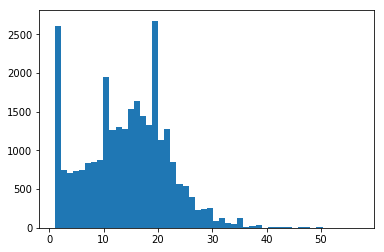

In [11]:
df = pd.read_csv('yyf-0811.csv', names=['ID', 'Level', 'Fans_Icon', 'Content'])
plt.hist(df['Level'], bins=50)

In [39]:
pd.Series.value_counts?

Signature: pd.Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
Docstring:
Returns object containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values
ascending : boolean, default False
    Sort in ascending order
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for pd.cut, only works with numeric data
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series
File:      c:\users\zw493\anaconda3\lib\site-packages\pandas\core\base.py
Type:      function


In [46]:
df['Fans_Icon'].value_counts()

11457

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
from multiprocessing import Pool
import pandas as pd
import numpy as np
import csv

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [5]:
browser = webdriver.Chrome()
browser.get('https://www.huya.com/longdd')

In [69]:
with open('test.csv', 'w+', newline='') as f:
    writer.writerows(d)   

In [115]:
s = time.time()
node = browser.find_elements_by_xpath('//div[@class="msg-normal"]')[4]
wait = WebDriverWait(browser, 3600)
chunks = re.findall('<div class="msg-normal">(.*?)</div>', browser.page_source, re.S)

for chunk in chunks:
    name = re.findall('个人信息">(.*?)</span', chunk, re.S)[0]   
    fans = re.findall('fans-icon-.*?">(.*?)</span>', chunk, re.S)
    if fans:
        fans = fans[0]
        level = re.findall('fans-icon-(.*?)">', chunk, re.S)[0]
    else:
        fans = '无粉丝牌'
        level = '-1'
        
    content = re.findall('"msg".*?>(.*?)</span>', chunk, re.S)[0]
    #print(name, fans, level, content)
    with open('test.csv', 'a+', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow([name, fans, level, content])
print(time.time()-s)

0.06404590606689453


In [116]:
s = time.time()
node = browser.find_elements_by_xpath('//div[@class="msg-normal"]')[4]
wait = WebDriverWait(browser, 3600)
chunks = re.findall('<div class="msg-normal">(.*?)</div>', browser.page_source, re.S)

names = []
fans = []
levels = []
contents = []

for chunk in chunks:
    fan = re.findall('fans-icon-.*?">(.*?)<' , chunk, re.S)
    if re.findall('fans-icon-.*?">(.*?)<' , chunk, re.S):
        fans.append(fan[0])
        levels.append(re.findall('fans-icon-(.*?)">', chunk, re.S)[0])
    else:
        fans.append('无粉丝牌')
        levels.append('-1')
    names.append(re.findall('个人信息">(.*?)</span', chunk, re.S)[0])
    contents.append(re.findall('"msg".*?>(.*?)</span>', chunk, re.S)[0])
    
with open('test.csv', 'a+', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(zip(names,fans,levels,contents))
    
print(time.time()-s)
node

0.043882131576538086


<selenium.webdriver.remote.webelement.WebElement (session="45529200794eb7313925244e4b8e6c7d", element="0.5146394365784026-313")>

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="ie6" lang="zh-cmn-Hans"> <![endif]-->
<!--[if IE 7]>         <html class="ie7" lang="zh-cmn-Hans"> <![endif]-->
<!--[if IE 8]>         <html class="ie8" lang="zh-cmn-Hans"> <![endif]-->
<!--[if IE 9]>         <html class="ie9" lang="zh-cmn-Hans"> <![endif]-->
<!--[if gt IE 9]><!-->
<html lang="zh-cmn-Hans" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <script src="//hm.baidu.com/hm.js?51700b6c722f5bb4cf39906a596ea41f">
  </script>
  <script src="https://a.msstatic.com/huya/hd/cdn_libs/performance_report-min.js?v=1">
  </script>
  <meta charset="utf-8"/>
  <meta content="webkit" name="renderer"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="虎牙龙弟弟（longdd）是虎牙直播的dota2职业选手主播，更是DOTA赛事官方解说主播，虎牙龙弟弟直播间给用户带来dota2直播和dota赛事直播，龙弟弟直播间，更多的DOTA直播尽在虎牙直播!" name="description"/>
  <meta content="龙弟弟直播,英雄联盟主播" name="Keywords"/>
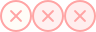
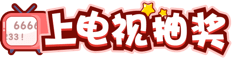
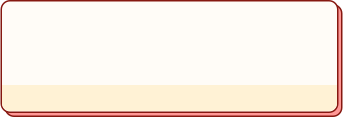
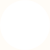
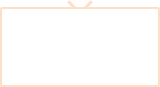
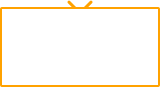
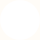
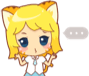

In [7]:
print(BeautifulSoup(browser.page_source, 'lxml').prettify())